# Class 06: Graphing in Python 2 part 1

Matplotlib - density plots & 2D graphics 

- Complete the activities as instructed by the professor

#### Import any packages we need below (update as we go):

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Density Plots 


####  Creating a density plot

- Read in the 'circular.txt' data
- create a density plot
- switch the origin to the lower left


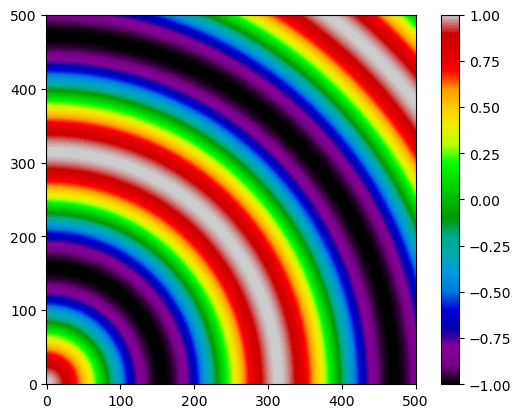

In [8]:
data = np.loadtxt("circular.txt", float)
plt.imshow(data, origin="lower")
plt.nipy_spectral()
plt.colorbar()
plt.show()

#### Color-scales and colorbars
-  For the plot above: 
    - change the color-scale 
    - add a colorbar

#### Additional Density Plot Customizations 
- Play around with `extent` to see how it impacts the density plot 
- change the axis ratio using `aspect`

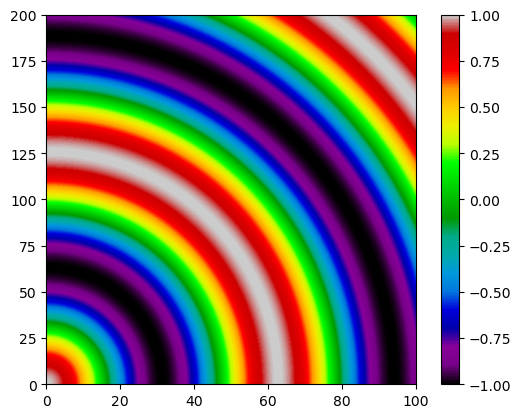

In [10]:
plt.imshow(data, origin="lower", extent=[0,100,0,200], aspect=0.5) # extent also changes aspect ratio
plt.colorbar()
plt.show()

#### Book Example: Wave interference (page 108)

Suppose we drop a pebble in a pond and waves radiate out from the spot where it fell. We could create a simple representation of the physics with a sine wave, spreading out in a uniform circle, to represent the height of the waves at some later time. If the center of the circle is at $x_1$, $y_1$ then the distance $r_1$ to the center from a point $x, y$ is

For the distance from the center of a circlular wave:

$$ r_1 = \sqrt{(x-x_1)^2+(y-y_1)^2} $$
and the height of the wave on a surface would be sinusoidal:

$$ h_1(x,y) = h_0\sin{kr_1} $$
where $k = 2\pi/\lambda$ is the wave vector. 

To superimpose two waves, we need a second set of distances and heights: 

$$ r_2 = \sqrt{(x-x_2)^2+(y-y_2)^2} $$

$$ h_2(x,y) = h_0\sin{kr_2} $$


The superposition is of the heights at any location: 

$$ h(x,y) = h_0\sin{kr_1} + h_0\sin{kr_2}$$

Suppose the wavelength of the waves is $\lambda$ = 5 cm, the amplitude is 1 cm, and the centers of the circles are 20 cm apart. Here is a program to make an image of the height over a 1 m square region of the pond. To make the image we create an array of values representing the height $h$ at a grid of points and then use that array to make a density plot. In this example we use a grid of 500 × 500 points to cover the 1 m square, which means the grid points have a separation of 100/500 = 0.2 cm.

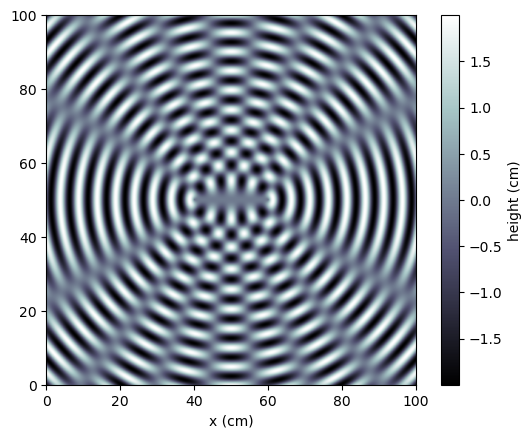

In [18]:
# constants
wavelength = 5.0 # in cm
k = 2*np.pi / wavelength # wave vector
h0 = 1.0 # amplitude in cm
separation = 20.0 # cm deparation of circles

# set up grid information
side = 100 # side of pond in cm
points = 500 # number of elements per side of the array
spacing = side/points # spacing of points in grid in physical units

# calculate the positions of each circle
x1 = side/2 - separation/2
y1 = side/2
x2 = side/2 + separation/2
y2 = side/2

# create array to store the heights of the superpositioned waves
h = np.zeros([points,points], float)

# calculate the heights
for i in range(points): # y-values (rows)
    y = i*spacing
    for j in range(points): # x-values (columns)
        x = j*spacing
        r1 = np.sqrt((x-x1)**2 + (y-y1)**2)
        r2 = np.sqrt((x-x2)**2 + (y-y2)**2)
        h1 = h0*np.sin(k*r1)
        h2 = h0*np.sin(k*r2)
        h[i,j] = h1 + h2

# make the density plot
plt.imshow(h, origin="lower", extent=[0, side, 0, side])
plt.bone()
plt.xlabel("x (cm)")
plt.colorbar(label="height (cm)")
plt.show()




#### Create an array to make a density plot

Create an array that is 50x50 for a density plot. To do so: 
- create a 1D array `theta` that is 50 values equally spaced between 0 and 3$\pi$ 
- create an 2 arrays: each should be a 1D array that is $5\sin$(`theta`)
- Now, in a 2D array that is 50x50, loop through the add the two arrays together 

## Drawings in Python

In [3]:
from qdraw import window, circle, square, show, draw
import numpy as np
import matplotlib.pyplot as plt
import math

#### Let's create a window that has a circle

- Note, you must use `draw()` for the separate window to pop up. It will remain open and continue to update each time you call `draw()` again 
    - you will have to restart the kernel when it is closed though! 
- You can alternatively use `show()` but if you then close the window, which you will have to, you will need to restart the kernel to do anything else. 

In [ ]:
window(xlim=[-1,1], ylim=[-1,1])
circle(pos=[0,0], size=1)
draw()

: 

#### We can add a second circle that is green!

In [4]:
circle2 = circle(pos=[0.5,0.5], size=0.5, color='green')
draw()

#### And we can put a lattice of squares on top of that. 

In [5]:
L = 1
s = 0.3
for i in range(-L, L+1):
    for j in range(-L,L+1):
        square(pos=[i,j], size=s, color='magenta')
        draw(0.5) # gives a delay

#### Atomic Lattice Example

#### Let's make a circle move! 

In [ ]:
window(xlim=[-1.1,1.1], ylim=[-1.1,1.1])
c = circle(size=0.2, pos=[1,0])
#c.trail()
for theta in np.arange(0,10*math.pi,0.02):
    x = math.cos(theta)
    y = math.sin(theta)
    c.setpos(x,y)
    draw(0.02)